## Scale Free Network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random

#### using Barabasi -albert_graph function
#####  m <= n 


graph graph


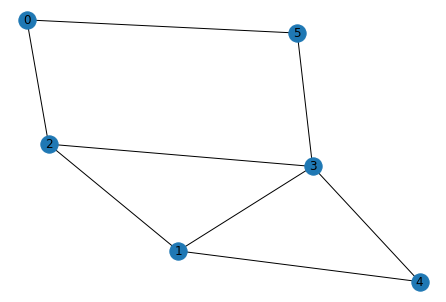

In [21]:
n = 6  # Number of nodes
m = 2 # Number of initial links
seed = 3 # m0 the initial graph 

G= nx.barabasi_albert_graph(n, m,seed)
nx.draw(G, with_labels= True)

#### The graph is arranged in row manner

total node: [0, 1, 2, 3, 4, 5]


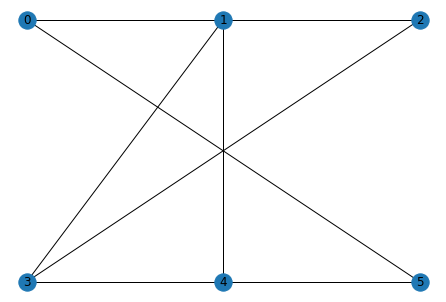

In [22]:
print("total node:",G.nodes)
ncols = 3
pos = {i : (i % ncols, (n-i-1) // ncols) for i in G.nodes()}
# print(pos)
nx.draw(G, pos, with_labels=True)    
plt.show()

#### The nodes and their degrees

In [23]:
degrees = [val for (node, val) in G.degree()]
nodes  = [node for (node, val) in G.degree()]
print(len(nodes))
deg = {}
for (n,d) in zip(nodes, degrees):
    print('node:', n,'->','degree:', d)
    deg[n] = d
print('Nodes and their degrees as dict:',deg)

6
node: 0 -> degree: 2
node: 1 -> degree: 3
node: 2 -> degree: 3
node: 3 -> degree: 4
node: 4 -> degree: 2
node: 5 -> degree: 2
Nodes and their degrees as dict: {0: 2, 1: 3, 2: 3, 3: 4, 4: 2, 5: 2}


### the hubs can be found by the deg_centrality 

In [24]:
def find_hub(deg):
    i =0
    dc = {}
    for n, deg in deg.items():
        cen = deg/(len(nodes)-1)
        dc[n] = cen 
#         print('Node',n,'->',"Deg_centality is :",cen)
    k = dict(sorted(dc.items(), key=lambda item: item[1], reverse = True))
#     print(k)
    k = dict(itertools.islice(k.items(), 3))
    print('\nHubs')
    return k

find_hub(deg)


Hubs


{3: 0.8, 1: 0.6, 2: 0.6}

### The hub with high degree is chosen for the deletion

In [25]:
p = list(find_hub(deg))
print(p)
print('The hub with high degree chosen  is : ',p[0])


Hubs
[3, 1, 2]
The hub with high degree chosen  is :  3


### Find the nodes connected to the node to be deleted


In [26]:
print(G.neighbors(p[0]))
[n for n in G.neighbors(p[0])]

[1, 2, 4, 5]

In [27]:
for neighbor in [n for n in G.neighbors(p[0])]:  ### removal of nodes
    G.remove_edge(p[0],neighbor)
#     G.remove_node(p[0])
    

#### the graph after removal

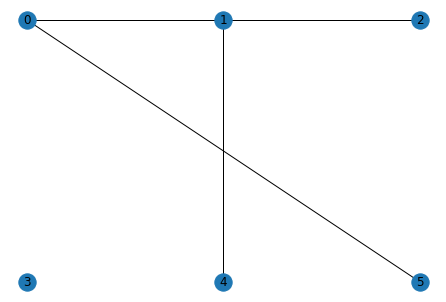

In [28]:
nx.draw(G, pos, with_labels=True) 

#### Re-calculation of the degrees_cent. and Hubs

In [29]:
degrees = [val for (node, val) in G.degree()]
nodes  = [node for (node, val) in G.degree()]
print(len(nodes))
deg = {}
for (n,d) in zip(nodes, degrees):
    print('node:', n,'->','degree:', d)
    deg[n] = d
print(deg)

6
node: 0 -> degree: 2
node: 1 -> degree: 2
node: 2 -> degree: 2
node: 3 -> degree: 0
node: 4 -> degree: 1
node: 5 -> degree: 1
{0: 2, 1: 2, 2: 2, 3: 0, 4: 1, 5: 1}


In [30]:
list(find_hub(deg))


Hubs


[0, 1, 2]